In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
trn=pd.read_csv('titanic_train.csv')
trn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tst=pd.read_csv('titanic_test.csv')
tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
trn.shape

(891, 12)

In [5]:
tst.shape

(418, 11)

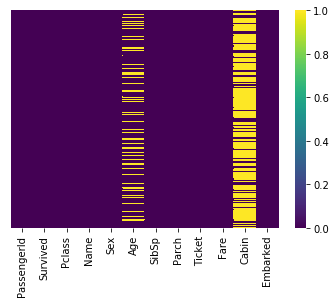

In [8]:
sns.heatmap(trn.isnull(),yticklabels=False,cbar=True,cmap='viridis')

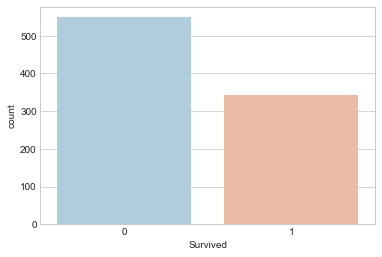

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=trn,palette='RdBu_r')

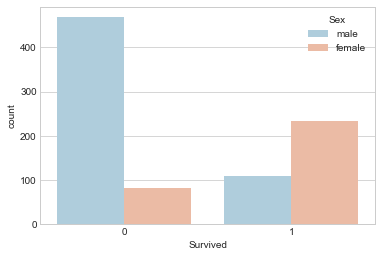

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=trn,palette='RdBu_r')

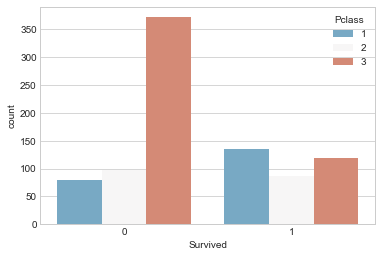

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=trn,palette='RdBu_r')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


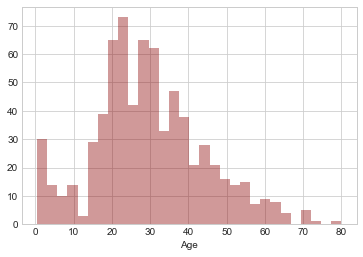

In [15]:
sns.distplot(trn['Age'].dropna(),kde=False,color='darkred',bins=30)

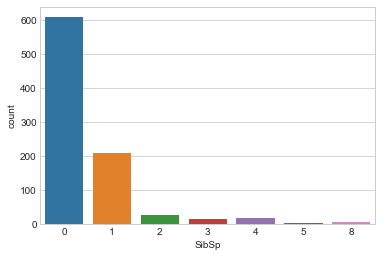

In [16]:
sns.countplot(x='SibSp',data=trn)

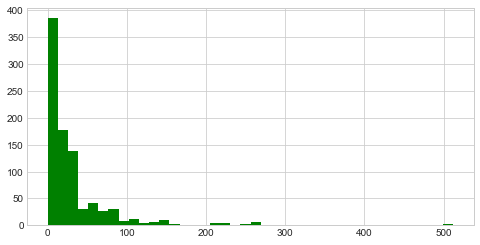

In [17]:
trn['Fare'].hist(color='green',bins=40,figsize=(8,4))

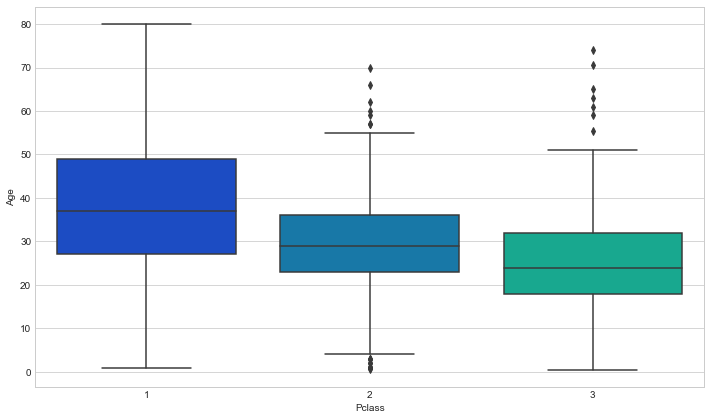

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=trn,palette='winter')

In [3]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [4]:
trn['Age']=trn[['Age','Pclass']].apply(impute_age,axis=1)

In [24]:
trn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


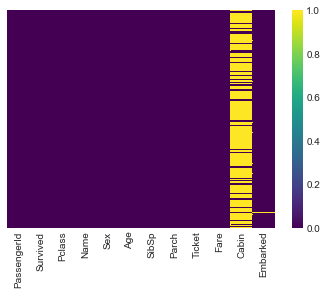

In [22]:
sns.heatmap(trn.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [5]:
trn.drop('Cabin',axis=1,inplace=True)

In [6]:
trn.dropna(inplace=True)

In [26]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [7]:
sex=pd.get_dummies(trn['Sex'],drop_first=True)
embark=pd.get_dummies(trn['Embarked'],drop_first=True)

In [8]:
trn.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [9]:
trn=pd.concat([trn,sex,embark],axis=1)

In [10]:
trn.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(trn.drop('Survived',axis=1),trn['Survived'],test_size=0.30,random_state=101)


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predictions=logmodel.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [17]:
from sklearn.metrics import confusion_matrix
#precision=tp/(tp+fp) recall=tp/tp+fn f1-score=harmonic avg

In [18]:
print(confusion_matrix(y_test,predictions))

[[151  12]
 [ 36  68]]


In [23]:
print(logmodel.coef_)

[[ 4.07955382e-04 -7.86365405e-01 -2.63396134e-02 -2.12110745e-01
  -9.70466787e-02  4.63350974e-03 -2.34157562e+00 -1.74595104e-02
  -1.93376424e-01]]


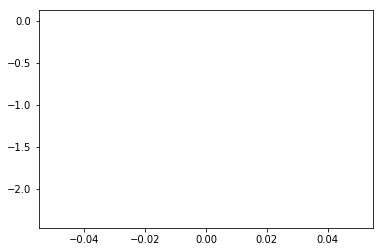

In [26]:
plt.plot(logmodel.coef_)

In [27]:
print(logmodel.intercept_)

[3.37364347]


In [41]:
68+151

219

In [42]:
219/267

0.8202247191011236

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
tst=pd.read_csv('titanic_test.csv')
tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


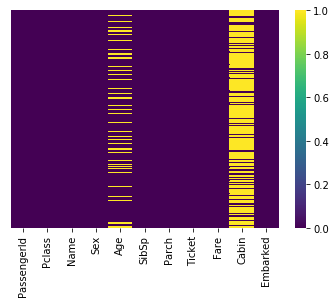

In [2]:
sns.heatmap(tst.isnull(),yticklabels=False,cbar=True,cmap='viridis');

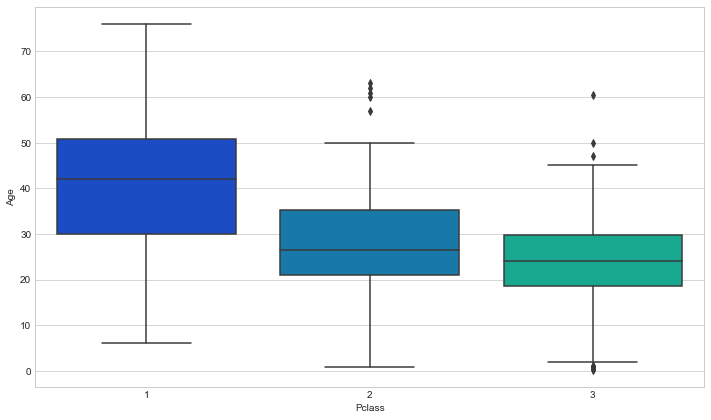

In [45]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=tst,palette='winter')

In [7]:
def impute_age1(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [8]:
tst['Age']=tst[['Age','Pclass']].apply(impute_age1,axis=1)

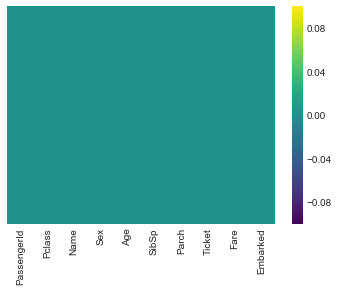

In [11]:
sns.heatmap(tst.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [10]:
tst.dropna(inplace=True)

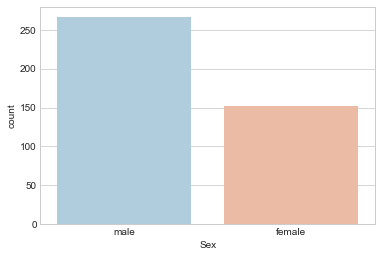

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=tst,palette='RdBu_r');

In [6]:
tst.drop('Cabin',axis=1,inplace=True)

In [12]:
tst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


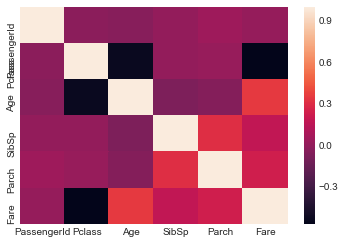

In [13]:
sns.heatmap(tst.corr());

In [15]:
sex=pd.get_dummies(tst['Sex'],drop_first=True)
embark=pd.get_dummies(tst['Embarked'],drop_first=True)

In [16]:
tst.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [17]:
tst=pd.concat([tst,sex,embark],axis=1)

In [18]:
tst.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(tst.drop('male',axis=1),tst['male'],test_size=0.30,random_state=101)


In [20]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
predictions=logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      0.10      0.16        61
          1       0.52      0.91      0.66        65

avg / total       0.51      0.52      0.42       126



In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))


[[ 6 55]
 [ 6 59]]


In [27]:
(59+6)/126

0.5158730158730159